In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

from pprint import pprint

%matplotlib inline

In [2]:
cols = ['sentiment', 'id', 'date', 'query', 'user', 'text']

In [40]:
df = pd.read_csv('data/training.csv', header=None, names=cols, encoding='utf-8')

UnicodeDecodeError: 'utf-8' codec can't decode bytes in position 80-81: invalid continuation byte

In [4]:
df.sentiment.value_counts()

4    800000
0    800000
Name: sentiment, dtype: int64

In [5]:
df.drop(labels=['id', 'date', 'query', 'user'], axis='columns', inplace=True)

In [6]:
df.head(n=10)

,sentiment,text
0,0,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,0,is upset that he can't update his Facebook by ...
2,0,@Kenichan I dived many times for the ball. Man...
3,0,my whole body feels itchy and like its on fire
4,0,"@nationwideclass no, it's not behaving at all...."
5,0,@Kwesidei not the whole crew
6,0,Need a hug
7,0,@LOLTrish hey long time no see! Yes.. Rains a...
8,0,@Tatiana_K nope they didn't have it
9,0,@twittera que me muera ?


In [7]:
df[df.sentiment == 4].head(n=10)

,sentiment,text
800000,4,I LOVE @Health4UandPets u guys r the best!!
800001,4,im meeting up with one of my besties tonight! ...
800002,4,"@DaRealSunisaKim Thanks for the Twitter add, S..."
800003,4,Being sick can be really cheap when it hurts t...
800004,4,@LovesBrooklyn2 he has that effect on everyone
800005,4,@ProductOfFear You can tell him that I just bu...
800006,4,@r_keith_hill Thans for your response. Ihad al...
800007,4,"@KeepinUpWKris I am so jealous, hope you had a..."
800008,4,"@tommcfly ah, congrats mr fletcher for finally..."
800009,4,@e4VoIP I RESPONDED Stupid cat is helping me ...


In [8]:
df['pre_clean_len'] =[len(df.text) for t in df.text]

In [9]:
df.head()

,sentiment,text,pre_clean_len
0,0,"@switchfoot http://twitpic.com/2y1zl - Awww, t...",1600000
1,0,is upset that he can't update his Facebook by ...,1600000
2,0,@Kenichan I dived many times for the ball. Man...,1600000
3,0,my whole body feels itchy and like its on fire,1600000
4,0,"@nationwideclass no, it's not behaving at all....",1600000


In [10]:
data_dict = {
    'sentiment': {
        'type': df.sentiment.dtype,
        'description': 'sentiment class; 0-negative and 4-positive'
    },
    'text': {
        'type': df.text.dtype,
        'description': 'tweet text'
    },
    'pre_clean_len': {
        'type': df.pre_clean_len.dtype,
        'description': 'length of a tweer text before cleaning'
    },
    'dataset_shape': df.shape
}

In [11]:
pprint(data_dict)

{'dataset_shape': (1600000, 3),
 'pre_clean_len': {'description': 'length of a tweer text before cleaning',
                   'type': dtype('int64')},
 'sentiment': {'description': 'sentiment class; 0-negative and 4-positive',
               'type': dtype('int64')},
 'text': {'description': 'tweet text', 'type': dtype('O')}}


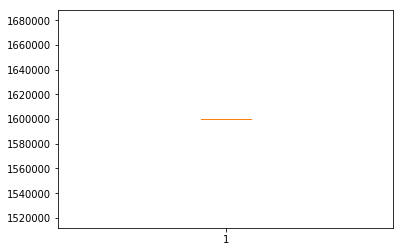

In [12]:
plt.boxplot(df.pre_clean_len)
plt.show()

In [13]:
df[df.pre_clean_len > 140].head(10)

,sentiment,text,pre_clean_len
0,0,"@switchfoot http://twitpic.com/2y1zl - Awww, t...",1600000
1,0,is upset that he can't update his Facebook by ...,1600000
2,0,@Kenichan I dived many times for the ball. Man...,1600000
3,0,my whole body feels itchy and like its on fire,1600000
4,0,"@nationwideclass no, it's not behaving at all....",1600000
5,0,@Kwesidei not the whole crew,1600000
6,0,Need a hug,1600000
7,0,@LOLTrish hey long time no see! Yes.. Rains a...,1600000
8,0,@Tatiana_K nope they didn't have it,1600000
9,0,@twittera que me muera ?,1600000


As we can clearly see, some comments have still undecoded HTML strings. We can handle that by using BeautifulSoup lib

# Dealing with HTML

In [14]:
from bs4 import BeautifulSoup

In [15]:
text = df.text.loc[343]

In [16]:
print(text)

@TheLeagueSF Not Fun &amp; Furious? The new mantra for the Bay 2 Breakers? It was getting 2 rambunctious;the city overreacted &amp; clamped down 


In [17]:
processed_text = BeautifulSoup(text, 'lxml')

In [21]:
processed_text = processed_text.get_text()

# Dealing with mentioning (@)

In [22]:
import re
re.sub(r'@[A-Za-z0-0]+','',processed_text)

' Not Fun & Furious? The new mantra for the Bay 2 Breakers? It was getting 2 rambunctious;the city overreacted & clamped down '

# Dealing with links

In [23]:
link_text = re.sub(r'https?://[A-Za-z0-9./]+', '', df.text.loc[0])

In [24]:
link_text

"@switchfoot  - Awww, that's a bummer.  You shoulda got David Carr of Third Day to do it. ;D"

# UTF-8 BOM (Byte Order Mark)

In [72]:
bom_text = df.text[226]

In [73]:
''.join(list(filter(lambda x: x.encode('utf8').isalpha() or x.isdigit() or x==' ', bom_text)))

'Tuesdayll start with reflection n then a lecture in Stress reducing techniques That sure might become very useful for us accompaniers '

# Remove neither alphabetic nor numeric values

In [67]:
df.text[175]

"@machineplay I'm so sorry you're having to go through this. Again.  #therapyfail"

In [69]:
re.sub(r'[^A-Za-z0-9]', ' ', df.text[175])

' machineplay I m so sorry you re having to go through this  Again    therapyfail'

# Cleanning function (summary)

In [86]:
from nltk.tokenize import WordPunctTokenizer
tokenizer = WordPunctTokenizer()
pattern_1 = r'@[A-Za-z0-9]+'
pattern_2 = r'https?://[A-Za-z0-9./]+'
pattern = r'|'.join([pattern_1, pattern_2])

@[A-Za-z0-9]+|https?://[A-Za-z0-9./]+


In [94]:
def cleaner(text):
    soup = BeautifulSoup(text, 'lxml')
    souped = soup.get_text()
    stripped = re.sub(pattern, '', souped)
    try:
        cleaned = ''.join(list(
                            filter(
                                lambda x: x.encode('utf8').isalpha() or x.isdigit() or x==' ',
                                stripped
                            )))
    except:
        cleaned = stripped
    letters_only = re.sub("[^a-zA-Z]", " ", cleaned)
    lower_case = letters_only.lower()
    words = tokenizer.tokenize(lower_case)
    return (" ".join(words)).strip()

In [95]:
testing = df.text[:100]
test_results = []
for testing_tweet in testing:
    test_results.append(
        cleaner(testing_tweet)
    )
print(test_results)

['awww thats a bummer you shoulda got david carr of third day to do it d', 'is upset that he cant update his facebook by texting it and might cry as a result school today also blah', 'i dived many times for the ball managed to save the rest go out of bounds', 'my whole body feels itchy and like its on fire', 'no its not behaving at all im mad why am i here because i cant see you all over there', 'not the whole crew', 'need a hug', 'hey long time no see yes rains a bit only a bit lol im fine thanks hows you', 'k nope they didnt have it', 'que me muera', 'spring break in plain city its snowing', 'i just repierced my ears', 'i couldnt bear to watch it and i thought the ua loss was embarrassing', 'it it counts idk why i did either you never talk to me anymore', 'i wouldve been the first but i didnt have a gun not really though zac snyders just a doucheclown', 'i wish i got to watch it with you i miss you and how was the premiere', 'hollis death scene will hurt me severely to watch on film 

In [104]:
nums = [0, 400000, 800000, 1200000, 1600000]
ranges = list(zip(range(len(nums) - 1), range(1,len(nums))))
print('Cleaning and parsing tweets')
clean_tweet_text = []

Cleaning and parsing tweets


In [108]:
for start, end in ranges:
    for i in range(nums[start], nums[end]):
        
        if (i+1) % 10000 == 0 :
            print('Tweets {0} of {1} have been processed'.format(i + 1, nums[end]))
        
        clean_tweet_text.append(
            cleaner(df.text[i])
        )

Tweets 10000 of 400000 have been processed
Tweets 20000 of 400000 have been processed
Tweets 30000 of 400000 have been processed
Tweets 40000 of 400000 have been processed
Tweets 50000 of 400000 have been processed
Tweets 60000 of 400000 have been processed
Tweets 70000 of 400000 have been processed
Tweets 80000 of 400000 have been processed
Tweets 90000 of 400000 have been processed
Tweets 100000 of 400000 have been processed
Tweets 110000 of 400000 have been processed
Tweets 120000 of 400000 have been processed
Tweets 130000 of 400000 have been processed
Tweets 140000 of 400000 have been processed
Tweets 150000 of 400000 have been processed
Tweets 160000 of 400000 have been processed
Tweets 170000 of 400000 have been processed
Tweets 180000 of 400000 have been processed
Tweets 190000 of 400000 have been processed
Tweets 200000 of 400000 have been processed
Tweets 210000 of 400000 have been processed
Tweets 220000 of 400000 have been processed
Tweets 230000 of 400000 have been process

In [109]:
cleaned_df = pd.DataFrame(clean_tweet_text, columns=['text'])
cleaned_df['target'] = df.sentiment
cleaned_df.head()

,text,target
0,awww thats a bummer you shoulda got david carr...,0.0
1,is upset that he cant update his facebook by t...,0.0
2,i dived many times for the ball managed to sav...,0.0
3,my whole body feels itchy and like its on fire,0.0
4,no its not behaving at all im mad why am i her...,0.0


In [ ]:
file_name = 'clean_tweets.csv'
cleaned_df.